**Каждый банк хочет удержать своих клиентов для поддержания своего бизнеса.**

**Ниже приведены данные о клиентах владельцев счетов в многонациональном банке ABC, целью которых будет прогнозирование оттока клиентов.**

**Колонку 'churn', используемый в качестве переменной для предсказания.**

**1, если клиент покинул банк в течение некоторого периода**

**0, если он / она этого не сделал.**

**Импортируем библиотеки**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Загружаем данные**

In [2]:
train= pd.read_csv("Bank Customer Churn Prediction.csv")

**Смотрим данные**

In [3]:
train.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Проверим данные на дубликаты и посмотрим колличество строк и столбцов**

In [5]:
print(train.head(5))
print("Shape:", train.shape)
print("Duplicated data :", train.duplicated().sum())



   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
Shape: (10000, 12)
Duplicated data : 0


In [6]:
train_info = train.info()
print(train_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


**Посмотрим колличество ушедших клиентов и оставшихся**

In [7]:
train['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

**Посмотрим в процентах для определеня баланса классов**

In [8]:
count_no_sub = len(train[train['churn']==0])
count_sub = len(train[train['churn']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage drop clients", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage not drop clients", pct_of_sub*100)

percentage drop clients 79.63
percentage not drop clients 20.369999999999997


**Наблюдаем явный дисбаланс классов, но его мы поправим чуть позже**

**Проверим данные категориальных переменных на актуальность, чтобы убедиться, что в этих столбцах нет ошибок.**

In [9]:
print(train['country'].unique())
print(train['gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [10]:
train.groupby('country').mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
country,,,,,,,,,,
France,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [11]:
train.groupby('gender').mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
gender,,,,,,,,,,
Female,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


Text(0, 0.5, 'Frequency')

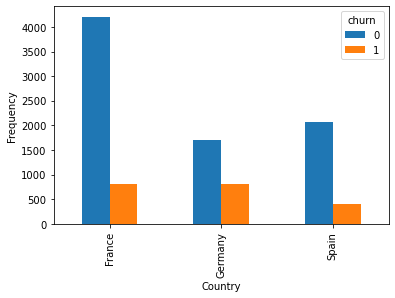

In [12]:
%matplotlib inline
pd.crosstab(train.country,train.churn).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency')


**Удалим стобец customer_id, потому что данные в нем явно не связаны с предсказываемой переменной.**

In [13]:
# Удаление выбранных столбцов
train = train.drop(["customer_id"], axis="columns")

In [14]:
train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Построим тепловую карту и определим мультиколлениарность данных**

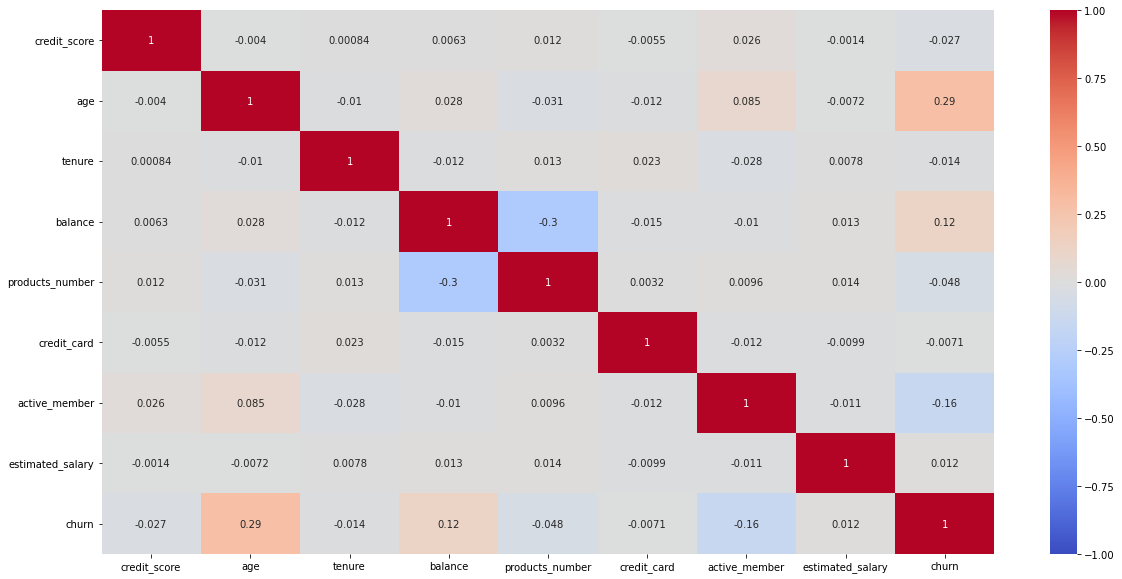

In [15]:
fig, ax= plt.subplots(figsize=(20, 10))

# Переменная для создания треугольника
mask = np.triu(np.ones_like(train.corr()))

# Корелляция колонки 'churn' с остальными колонками.  
# corplot = sns.heatmap(train.corr()[['churn']], vmin = -1, vmax = +1, cmap="coolwarm", annot=True)

# Квадратная тепловая карта зависимостей.
corplot = sns.heatmap(train.corr(), vmin = -1, vmax = +1, cmap="coolwarm", annot=True)

# Треугольная тепловая карта зависимости.
# corplot = sns.heatmap(train.corr(), vmin = -1, vmax = +1, cmap="coolwarm", annot=True, mask = mask)



**Видим, что данные слабо связанные между собой.**

**Наибольшую прямую связь имеет покзатель "age" с целевой переменной "churn", но и этот показатель будем считать статистически не значимым.**



**Проверим распределение числовых переменных, чтобы убедиться нет ли в них, аномально больших или маленьких данных.**

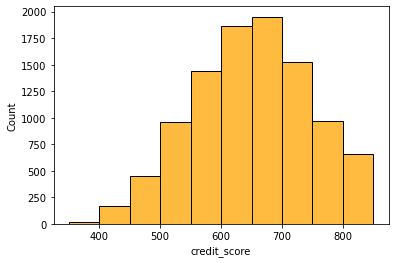

In [16]:
sns.histplot(data=train, x="credit_score", bins=10, color='orange');

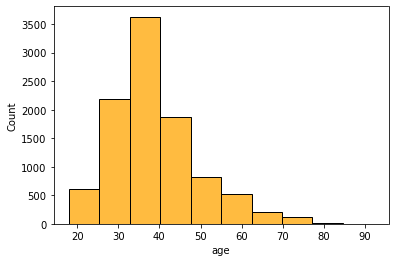

In [17]:
sns.histplot(data=train, x="age", bins=10, color='orange');

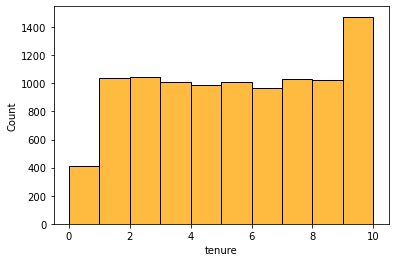

In [18]:
sns.histplot(data=train, x="tenure", bins=10, color='orange');

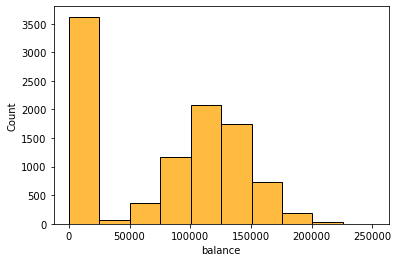

In [19]:
sns.histplot(data=train, x="balance", bins=10, color='orange');

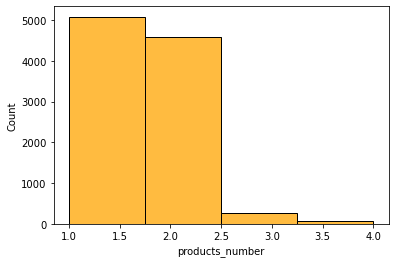

In [20]:
sns.histplot(data=train, x="products_number", bins=4, color='orange');

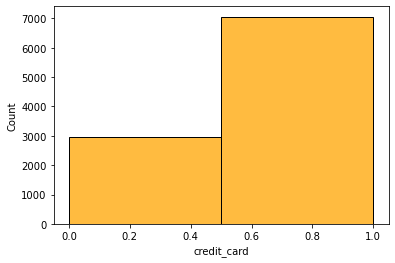

In [21]:
sns.histplot(data=train, x="credit_card", bins=2, color='orange');

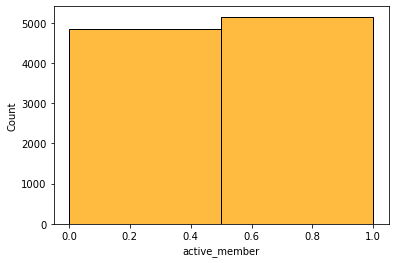

In [22]:
sns.histplot(data=train, x="active_member", bins=2, color='orange');

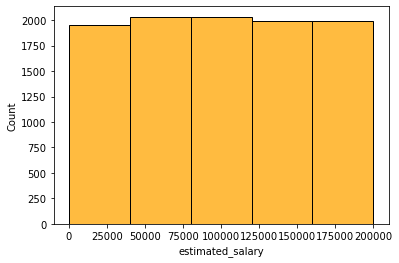

In [23]:
sns.histplot(data=train, x="estimated_salary", bins=5, color='orange');

In [24]:
train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Проверим распределение категориальных переменных.**

Text(0, 0.5, 'Clients')

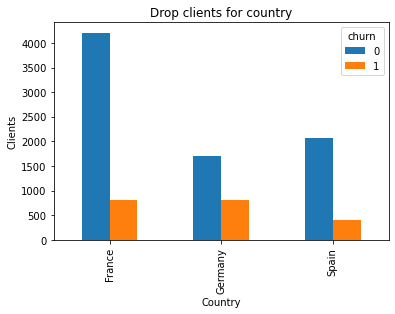

In [25]:
pd.crosstab(train.country,train.churn).plot(kind='bar')
plt.title('Drop clients for country')
plt.xlabel('Сountry')
plt.ylabel('Clients')


Text(0, 0.5, 'Clients')

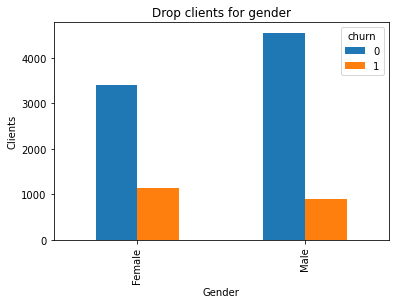

In [26]:
pd.crosstab(train.gender,train.churn).plot(kind='bar')
plt.title('Drop clients for gender')
plt.xlabel('Gender')
plt.ylabel('Clients')


**Теперь заменим катеориальные признаки на числовые используя get_dummies. Сделаем это для колонки 'gender'.**

In [27]:
gender = pd.get_dummies(train['gender'], drop_first = True)

gender = gender.rename(columns=
        {'Male': 'gender'})

In [28]:
gender

,gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


**Заменим в нашем датасете категориальную колонку 'gender' на новую колонку с числовыми данными**

In [29]:
train['gender'] = gender['gender']

In [30]:
train.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


**Сделаем замену и в колонке 'country', но используем для наглядности другой метод - LabelEncoder**

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_country = labelencoder.fit_transform(train['country'])
train_country

array([0, 2, 0, ..., 0, 1, 0])

In [32]:
train['country'] = train_country

In [33]:
train.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


**Посмотрим на колличество ушедших клиентов (1) и оставшихся (0).**

In [34]:
train_value = train.groupby('churn', as_index=False)\
    .aggregate({'churn': 'count'})

In [35]:
train_value

,churn
0,7963
1,2037


**Видим, что у нас дисбаланс классов. Изменим этом.**

**Используем алгоритм SMOTE (Synthetic Minority Oversampling Technique) для обогощения данных.**

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train.loc[:, train.columns != 'churn']
y = train.loc[:, train.columns == 'churn']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn'])


print("Длина данных с избыточной выборкой составляет", len(os_data_X))
print("Количество клиентов покинувших банк в данных с избыточной выборкой", len(os_data_y[os_data_y['churn']==1]))
print("Количество клиентов оставшихся в банке", len(os_data_y[os_data_y['churn']==0]))
print("Доля клиентов покинувших банк в данных с избыточной выборкой составляет", len(os_data_y[os_data_y['churn']==1])/len(os_data_X))
print("Доля клиентов оставшихся в банке в данных с избыточной выборкой составляет", len(os_data_y[os_data_y['churn']==0])/len(os_data_X))

Длина данных с избыточной выборкой составляет 11168
Количество клиентов покинувших банк в данных с избыточной выборкой 5584
Количество клиентов оставшихся в банке 5584
Доля клиентов покинувших банк в данных с избыточной выборкой составляет 0.5
Доля клиентов оставшихся в банке в данных с избыточной выборкой составляет 0.5


**Теперь данные сбалансированны**

**Мы подготовили данные для модели. Проверили содержание, структуру, закодировали категориальные переменные, избежав мультиколлинеарност.**

**Для построения модели можем выбрать метод логисчтической регрессии.**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [38]:
y_pred = logreg.predict(X_test)

print('Точность классификатора логистической регрессии на тестовом наборе: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность классификатора логистической регрессии на тестовом наборе: 0.68


**Матрица путаницы**

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1126  529]
 [ 546 1150]]


**Мы имеем:**

**1126+1150 верных**

**529+546 неверных прогнозов.**

**Расчёт точности, полноты, F-меры и носителя**

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1655
           1       0.68      0.68      0.68      1696

    accuracy                           0.68      3351
   macro avg       0.68      0.68      0.68      3351
weighted avg       0.68      0.68      0.68      3351



**ROC-кривая**

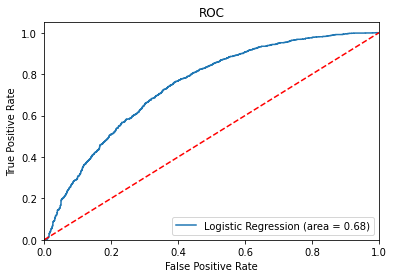

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

**Попробуем почистить данные по значимости показателей и посмотрим, будет наша модель более точная. Применим для этого рекурсивное устранение признаков.**

In [45]:
data_final_vars=train.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=8)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True  True False]
[1 1 1 1 1 2 1 1 1 3]


**Метод помог исключить следующие признаки: 'balance' и 'estimated_salary'**

In [48]:
cols=['credit_score', 'country', 'gender', 'age', 'products_number', 'credit_card', 'active_member'] 
X=os_data_X[cols]
y=os_data_y['churn']

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.491127
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.291     
Dependent Variable: churn            AIC:              10983.8119
Date:               2023-02-16 16:52 BIC:              11035.0575
No. Observations:   11168            Log-Likelihood:   -5484.9   
Df Model:           6                LL-Null:          -7741.1   
Df Residuals:       11161            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
credit_score     -0.0011   0.0002  -6.7520 0.0000 -0.0014 -0.0007
country          -0.1129   0.0310  -3.6413 0.0003 -0.1737 -0.0521


**p-значение переменных меньше 0,05**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [51]:
y_pred = logreg.predict(X_test)

print('Точность классификатора логистической регрессии на тестовом наборе: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность классификатора логистической регрессии на тестовом наборе: 0.77


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1281  374]
 [ 380 1316]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1655
           1       0.78      0.78      0.78      1696

    accuracy                           0.77      3351
   macro avg       0.77      0.77      0.77      3351
weighted avg       0.78      0.77      0.77      3351



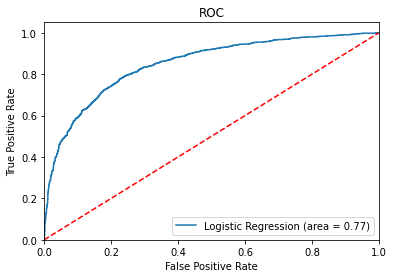

In [54]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

**Получаем модель с лучшей точностью, чем была**